In [210]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)

2.13.0


In [297]:
#Загрузка файла data1.csv
df = pd.read_csv('/Users/Сергей/Downloads/data.csv')
df.head()



,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [212]:
df.shape

(11934, 18)

In [213]:
np.unique(df['Древний Ветер'])

array(['1.019', '1.02', '1.021', '1.022', '1.023', '1.026', '1.027',
       '1.03', '1.031', '1.035', '1.036', '1.04', '1.041', '1.042',
       '1.043', '1.049', '1.05', '1.051', '1.052',
       'Древний Ветер развеялся'], dtype=object)

In [214]:
np.unique(df['Температура выдоха Истока'])

array(['542.994', '543.195', '543.306', ..., '788.291', '788.433',
       'Исток не вернул выдох'], dtype=object)

In [215]:
df = df.copy()
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [216]:
df.isna()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11930,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11931,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [217]:
df.isna().sum()

Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Температура вдоха Истока          0
Температура выдоха Истока         0
Приток давления Выдоха Истока     0
Давление вдоха Истока             0
Давление выдоха Истока            0
Древний Ветер                     0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Гармония Бессмертия               0
dtype: int64

In [218]:
df = df.dropna()

In [219]:
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.00,1.000


In [220]:
df.shape

(11934, 18)

In [221]:
#Выделяем гармонию бессмертия
X = df.copy()
y = X.pop('Гармония Бессмертия')



In [222]:
X

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.00
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.00
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.00


In [223]:
y

0        0.975
1        0.975
2        0.975
3        0.975
4        0.975
         ...  
11929    1.000
11930    1.000
11931    1.000
11932    1.000
11933    1.000
Name: Гармония Бессмертия, Length: 11934, dtype: float64

In [224]:
#Разбиение выборки
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [225]:
df[['Приток Силы Потока', 'Сила Левого Потока', 'Сила Правого Потока']]

,Приток Силы Потока,Сила Левого Потока,Сила Правого Потока
0,289.964,7.584,7.584
1,6960.180,28.204,28.204
2,8379.229,60.358,60.358
3,14724.395,113.774,113.774
4,21636.432,175.306,175.306
...,...,...,...
11929,21624.934,175.239,175.239
11930,29763.213,245.954,245.954
11931,39003.867,332.389,332.389
11932,50992.579,438.024,438.024


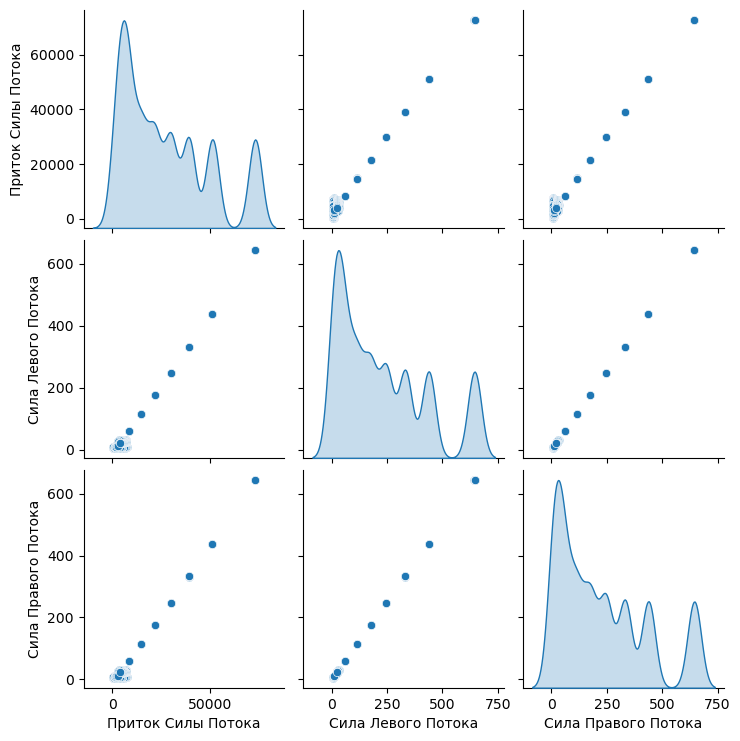

In [226]:
#Визуализация данных
sns.pairplot(df[['Приток Силы Потока', 'Сила Левого Потока',  'Сила Правого Потока']], 
             diag_kind='kde')

In [227]:
X.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
Вектор Мощи,11934.0,5.17,2.63,1.14,3.14,5.14,7.15,9.30
Скорость перехода через портал,11934.0,7.72,3.99,1.54,4.63,7.72,10.80,13.89
Приток Силы Потока,11934.0,27247.50,22148.61,253.55,8375.88,21630.66,39001.43,72784.87
Ритм магического ядра,11934.0,223.71,81.06,136.94,145.22,201.51,280.45,372.88
Поток Энергий,11934.0,8200.95,1091.32,6589.00,7058.32,8482.08,9132.61,9797.10
Сила Левого Потока,11934.0,227.34,200.50,5.30,60.32,175.27,332.36,645.25
Сила Правого Потока,11934.0,227.34,200.50,5.30,60.32,175.27,332.36,645.25
Пламя Стихий,11934.0,735.50,173.68,442.36,589.87,706.04,834.07,1115.80
Температура вдоха Истока,11934.0,736.00,0.00,736.00,736.00,736.00,736.00,736.00
Приток давления Выдоха Истока,11934.0,2.35,1.08,1.09,1.39,2.08,2.98,4.56


In [228]:
X.describe().transpose()[['mean', 'std']]

,mean,std
Вектор Мощи,5.166667,2.626388e+00
Скорость перехода через портал,7.716600,3.985002e+00
Приток Силы Потока,27247.498685,2.214861e+04
Ритм магического ядра,223.711688,8.106187e+01
Поток Энергий,8200.947312,1.091316e+03
Сила Левого Потока,227.335768,2.004959e+02
Сила Правого Потока,227.335768,2.004959e+02
Пламя Стихий,735.495446,1.736806e+02
Температура вдоха Истока,736.000000,0.000000e+00
Приток давления Выдоха Истока,2.352963,1.084770e+00


In [229]:
#Нормализация данных
normalizer = tf.keras.layers.Normalization(axis=1)

In [230]:
first = np.array(X[:1])

with np.printoptions(precision=2):
    print('Первый пример:', first)
    print()
    print('Нормализованный:', normalizer(np.asarray(first).astype('float32')).numpy())

Первый пример: [[1.138 1.54332 289.964 141.31815761667454 6677.38 7.584 7.584 464.006
  736 'Исток не вернул выдох' 1.096 1.394603 5.947
  'Древний Ветер развеялся' 7.137 0.082 0.95]]



ValueError: could not convert string to float: 'Исток не вернул выдох'

In [231]:
#Построение модели от притока силы потока
search = np.array(X_train['Приток Силы Потока'])

search_normalizer = layers.Normalization(input_shape=[1,], axis=None)
search_normalizer.adapt(np.array(X['Приток Силы Потока']))

In [232]:
search

array([ 5963.523, 29762.244, 29765.291, ..., 72767.008, 21623.432,
        3280.513])

In [233]:
search_model = tf.keras.Sequential([
    search_normalizer,
    layers.Dense(units=1)
])

search_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [234]:
search[:10]

array([ 5963.523, 29762.244, 29765.291,  6027.301,  5218.302,  4708.723,
       29793.848, 14719.381, 14721.035, 14719.729])

In [235]:
search_model.predict(search[:10])

1/1 [==============================] - 0s 262ms/step


array([[ 0.165],
       [-0.019],
       [-0.019],
       [ 0.164],
       [ 0.17 ],
       [ 0.174],
       [-0.02 ],
       [ 0.097],
       [ 0.097],
       [ 0.097]], dtype=float32)

In [236]:
search_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [314]:
%%time
history = search_model.fit(
    X_train['Приток Силы Потока'],
    y_train,
    epochs=120,
    verbose=1,
    validation_split=0.2)

Epoch 1/120
191/191 [==============================] - 2s 13ms/step - loss: 0.0126 - val_loss: 0.0133
Epoch 2/120
191/191 [==============================] - 3s 15ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 3/120
191/191 [==============================] - 3s 14ms/step - loss: 0.0119 - val_loss: 0.0131
Epoch 4/120
191/191 [==============================] - 2s 12ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 5/120
191/191 [==============================] - 2s 12ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 6/120
191/191 [==============================] - 2s 10ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 7/120
191/191 [==============================] - 2s 10ms/step - loss: 0.0116 - val_loss: 0.0091
Epoch 8/120
191/191 [==============================] - 2s 9ms/step - loss: 0.0113 - val_loss: 0.0190
Epoch 9/120
191/191 [==============================] - 2s 10ms/step - loss: 0.0113 - val_loss: 0.0121
Epoch 10/120
191/191 [==============================] - 2s 10ms/step - loss: 0.0108

In [315]:
history.history

{'loss': [0.012625634670257568,
  0.011947553604841232,
  0.011914847418665886,
  0.011168144643306732,
  0.012273766100406647,
  0.011851482093334198,
  0.011638510972261429,
  0.011315827257931232,
  0.0112950773909688,
  0.010766861960291862,
  0.00951748713850975,
  0.013436752371490002,
  0.011952994391322136,
  0.011514742858707905,
  0.011738726869225502,
  0.011637904681265354,
  0.011952620930969715,
  0.011973372660577297,
  0.00969762820750475,
  0.011280317790806293,
  0.012283720076084137,
  0.011485323309898376,
  0.01418871060013771,
  0.011135025881230831,
  0.011430351994931698,
  0.012354296632111073,
  0.011829828843474388,
  0.011049739085137844,
  0.010128624737262726,
  0.012188105843961239,
  0.010418642312288284,
  0.01162035670131445,
  0.010462972335517406,
  0.010778824798762798,
  0.013208255171775818,
  0.012102252803742886,
  0.010835889726877213,
  0.01179638784378767,
  0.010568089783191681,
  0.014836532063782215,
  0.015214279294013977,
  0.01156848110

In [316]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
115,0.011318,0.010565,115
116,0.011072,0.012161,116
117,0.011374,0.008588,117
118,0.011363,0.007321,118
119,0.011836,0.017693,119


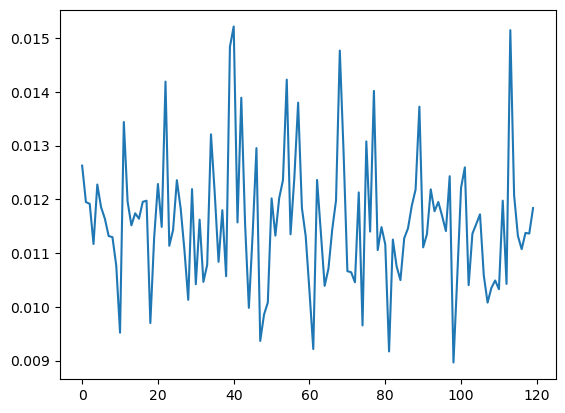

In [317]:
plt.plot(history.history['loss'], label='loss')

In [339]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([-0.1, 0.1])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [Приток Силы Потока]')
    plt.legend()
    plt.grid(True)

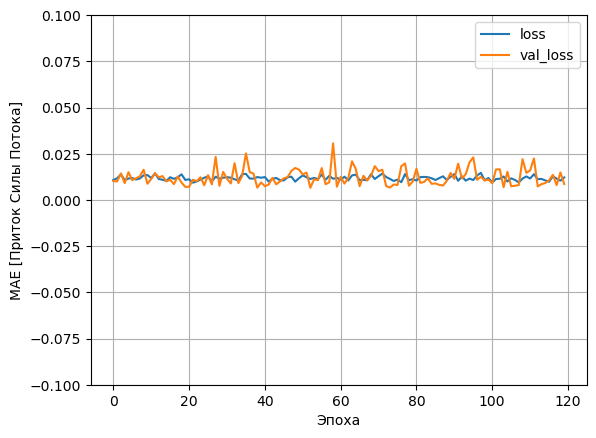

In [340]:
plot_loss(history)
plt.show()

Epoch 1/120
191/191 [==============================] - 3s 15ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 2/120
191/191 [==============================] - 2s 11ms/step - loss: 0.0117 - val_loss: 0.0100
Epoch 3/120
191/191 [==============================] - 2s 11ms/step - loss: 0.0138 - val_loss: 0.0144
Epoch 4/120
191/191 [==============================] - 2s 11ms/step - loss: 0.0107 - val_loss: 0.0091
Epoch 5/120
191/191 [==============================] - 2s 12ms/step - loss: 0.0116 - val_loss: 0.0150
Epoch 6/120
191/191 [==============================] - 2s 10ms/step - loss: 0.0119 - val_loss: 0.0107
Epoch 7/120
191/191 [==============================] - 2s 13ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 8/120
191/191 [==============================] - 2s 11ms/step - loss: 0.0116 - val_loss: 0.0128
Epoch 9/120
191/191 [==============================] - 2s 11ms/step - loss: 0.0133 - val_loss: 0.0163
Epoch 10/120
191/191 [==============================] - 2s 12ms/step - loss: 0.013

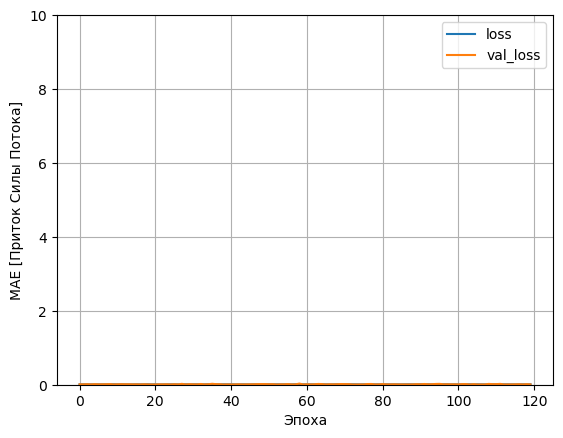

CPU times: total: 5min 7s
Wall time: 4min 33s


In [320]:

%%time
history = search_model.fit(
    X_train['Приток Силы Потока'],
    y_train,
    epochs=120,
    verbose=1,
    validation_split = 0.2)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_loss(history)
plt.show()

In [321]:
search_model.evaluate(X_test['Приток Силы Потока'], y_test, verbose=0)

0.008778991177678108

In [322]:
test_results = {}

test_results['search_model'] = search_model.evaluate(X_test['Приток Силы Потока'], 
                                                             y_test, verbose=0)

In [323]:
test_results

{'search_model': 0.008778991177678108}

In [348]:
tf.linspace(0.0, 110000, 110001)

<tf.Tensor: shape=(110001,), dtype=float32, numpy=
array([     0.,      1.,      2., ..., 109998., 109999., 110000.],
      dtype=float32)>

In [349]:
x = tf.linspace(0.0, 110000, 110001)
prediction = search_model.predict(x)

3438/3438 [==============================] - 26s 7ms/step


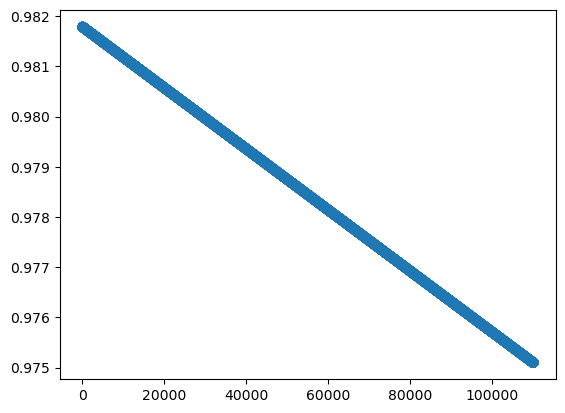

In [350]:
plt.scatter(x, prediction)

In [351]:
y_train.size

7637

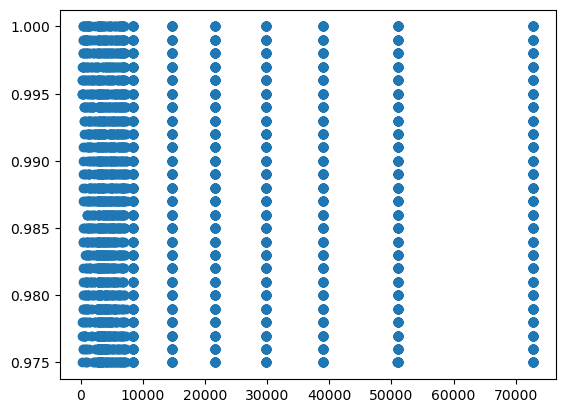

In [352]:
plt.scatter(X_train['Приток Силы Потока'], y_train)

In [353]:
def plot_search(x_train, y_train, x, prediction):
    plt.scatter(x_train, y_train, label='Data')
    plt.plot(x, prediction, color='k', label='Predictions')
    plt.xlabel('Приток Силы Потока')
    plt.ylabel('Гармония Бессмертия')
    plt.legend()
    plt.grid()
    plt.show()

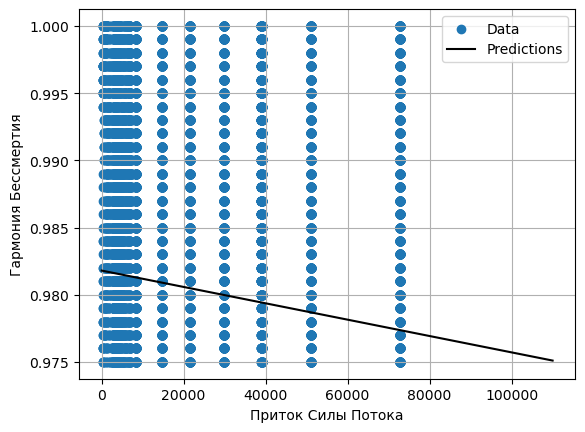

In [354]:
plot_search(X['Приток Силы Потока'], y, x, prediction)